In [10]:
import numpy as np 
import cvxpy as cp 
import matplotlib.pyplot as plt 
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence

In [37]:
rs = RandomState(MT19937(SeedSequence(123456789)))
n = 40
theta_tar = 15*np.pi/180 
delta = 15*np.pi/180 
N = 400 
x = 30*rs.rand(n,1)
y = 30*rs.rand(n,1)
b = np.array([1,0])
thetas = np.linspace(theta_tar+delta, 2*np.pi+theta_tar-delta, N)
constrain = [] 
w = cp.Variable(n,complex = True)
G = w@np.exp(1j*(x*np.cos(thetas)+y*np.sin(thetas)))
objective = cp.Minimize(cp.max(cp.abs(G)))
constrain = [
    w@np.exp(1j*(x*np.cos(theta_tar)+y*np.sin(theta_tar)))==1 
]
B = np.exp(1j*(x*np.cos(theta_tar)+y*np.sin(theta_tar)))
print(B.shape)
print(B)
prob = cp.Problem(objective, constrain)
result = prob.solve()
print(result)

(40, 1)
[[-0.03072524-0.99952787j]
 [ 0.77672195+0.62984364j]
 [-0.96669229-0.25594142j]
 [-0.76670811+0.64199586j]
 [ 0.08866866+0.99606118j]
 [-0.93851862+0.34522862j]
 [-0.96335377+0.26823407j]
 [ 0.99909774+0.04246999j]
 [ 0.39215645-0.91989854j]
 [ 0.95579719+0.29402674j]
 [-0.54564163-0.83801862j]
 [-0.71526153-0.69885688j]
 [ 0.99513428-0.09852801j]
 [-0.95457717-0.29796379j]
 [-0.89114574-0.45371717j]
 [-0.99886812+0.0475656j ]
 [-0.58230716-0.81296886j]
 [ 0.66902589-0.7432391j ]
 [-0.39962378+0.91667924j]
 [-0.13997594+0.99015491j]
 [ 0.42434462-0.90550077j]
 [ 0.99985151-0.01723242j]
 [-0.39646169-0.91805127j]
 [ 0.92766084-0.37342385j]
 [ 0.9914221 +0.13069898j]
 [-0.99808949+0.06178492j]
 [ 0.96830349-0.24977659j]
 [-0.62646073+0.77945298j]
 [-0.77948167-0.62642504j]
 [-0.72872733-0.68480397j]
 [-0.92433978+0.38157039j]
 [ 0.94577048+0.32483566j]
 [ 0.733943  +0.67921106j]
 [-0.59553675+0.80332807j]
 [ 0.6416309 -0.76701355j]
 [-0.84625356-0.53278037j]
 [-0.79685756+0.6041

(500,)
(40,)


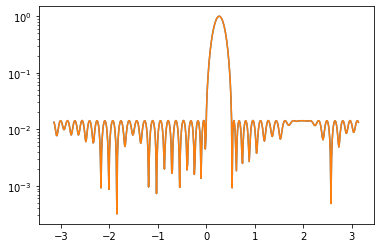

In [39]:

thetas = np.linspace(-np.pi,np.pi,500)
w_val= w.value 

#print(x.shape)
#print(np.cos(thetas).shape)
#print(x*np.cos(thetas))
G = w_val@np.exp(1j*(x*np.cos(thetas)+y*np.sin(thetas)))
print(G.shape)
print(w.shape)
plt.plot(thetas, np.abs(G))

plt.semilogy(thetas,np.abs(G))